弛豫: (>0.5:good)
 [0.049, 22406]
弛豫_adj: (>0.5:good)
 [0.304, 22278]


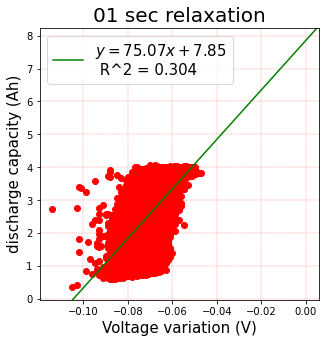

弛豫: (>0.5:good)
 [0.345, 22406]
弛豫_adj: (>0.5:good)
 [0.747, 22296]


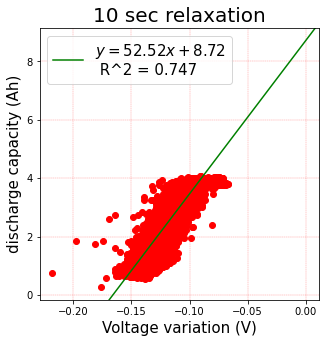

弛豫: (>0.5:good)
 [0.51, 22406]
弛豫_adj: (>0.5:good)
 [0.789, 22296]


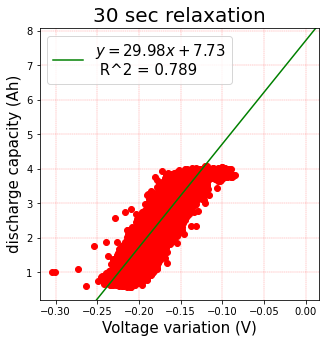

弛豫: (>0.5:good)
 [0.555, 22406]
弛豫_adj: (>0.5:good)
 [0.788, 22296]


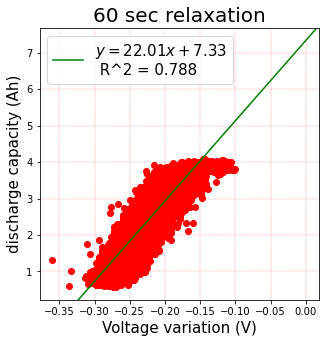

弛豫: (>0.5:good)
 [0.584, 22406]
弛豫_adj: (>0.5:good)
 [0.784, 22296]


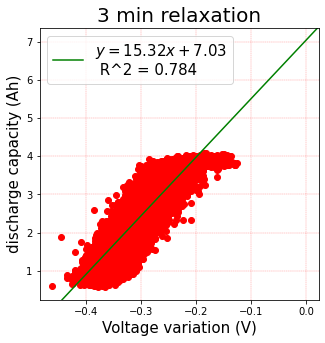

弛豫: (>0.5:good)
 [0.588, 22406]
弛豫_adj: (>0.5:good)
 [0.786, 22296]


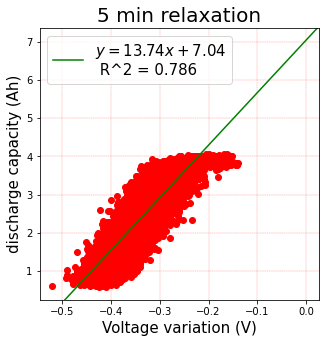

弛豫: (>0.5:good)
 [0.588, 22406]
弛豫_adj: (>0.5:good)
 [0.787, 22296]


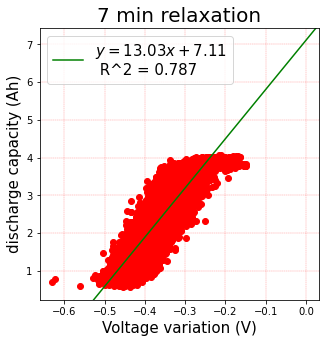

弛豫: (>0.5:good)
 [0.585, 22406]
弛豫_adj: (>0.5:good)
 [0.789, 22296]


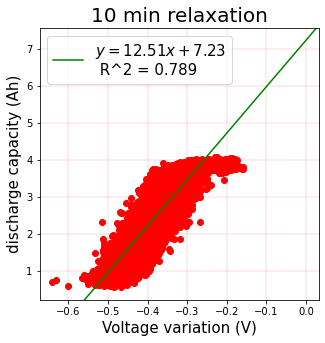

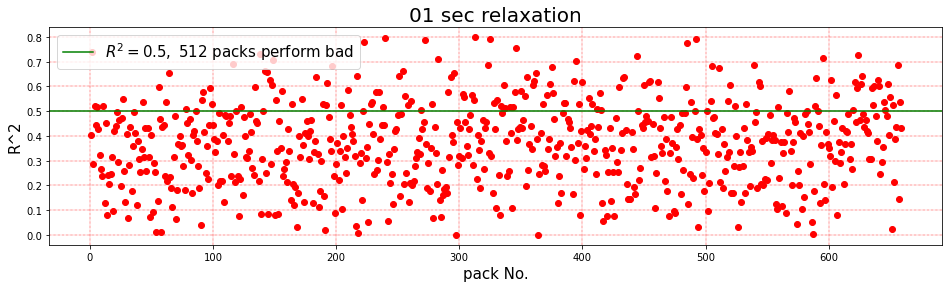

不好的packs(R^2<0.5):	 [  0   2   4   6   7   8   9  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  43  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60
  62  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79  80  81
  82  83  84  86  87  88  89  92  93  94  95  96  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 116 117 119 120 121 123 124 125
 126 127 128 129 130 131 132 134 135 136 138 139 142 144 146 149 151 152
 153 154 156 157 158 159 160 161 162 164 165 166 167 168 169 170 172 173
 174 175 176 177 178 179 180 181 182 184 185 186 187 189 190 193 194 195
 197 198 199 200 201 202 204 205 206 207 208 210 211 212 213 214 215 217
 218 219 220 223 224 225 226 229 230 232 233 235 236 238 240 241 242 243
 244 245 246 247 248 249 251 252 254 256 258 259 261 262 263 264 265 266
 267 269 270 272 273 274 275 276 278 279 280 281 283 284 285 286 287 288
 289 291 293 294 296 297 298 29

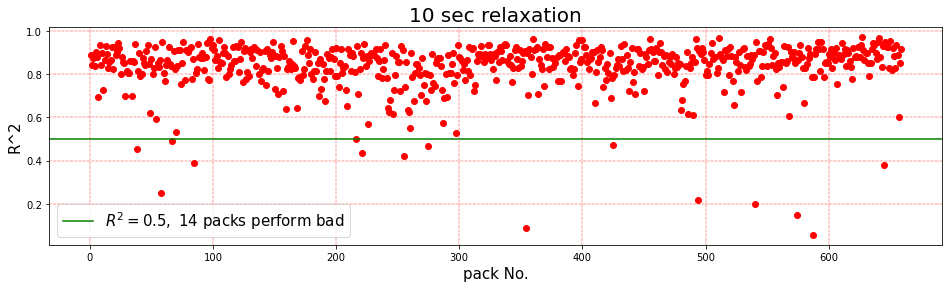

不好的packs(R^2<0.5):	 [ 37  57  66  84 220 254 274 353 424 493 539 573 586 644]


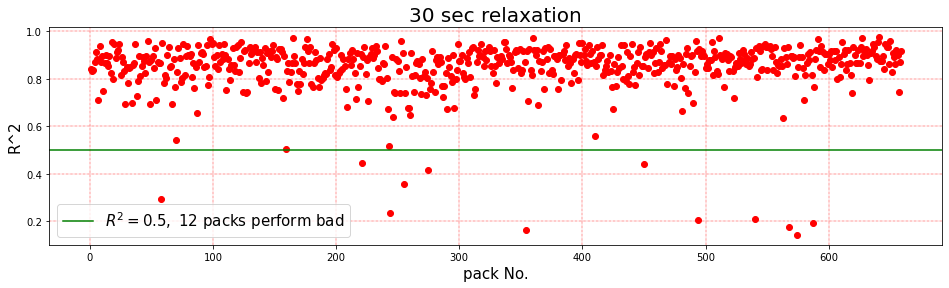

不好的packs(R^2<0.5):	 [ 57 220 243 254 274 353 449 493 539 567 573 586]


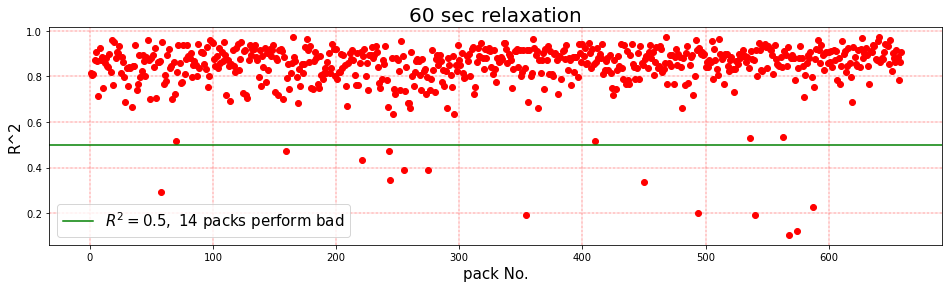

不好的packs(R^2<0.5):	 [ 57 158 220 242 243 254 274 353 449 493 539 567 573 586]


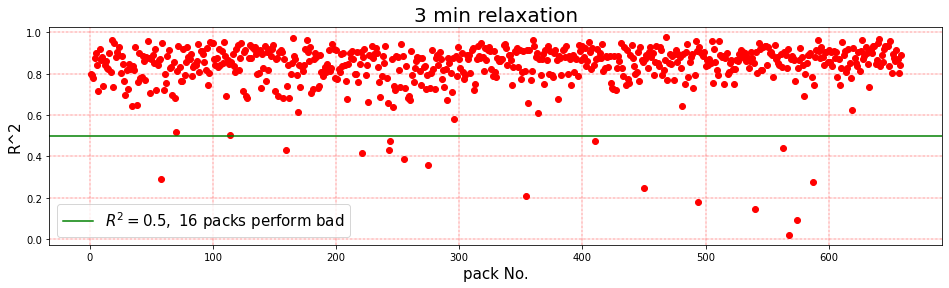

不好的packs(R^2<0.5):	 [ 57 158 220 242 243 254 274 353 409 449 493 539 562 567 573 586]


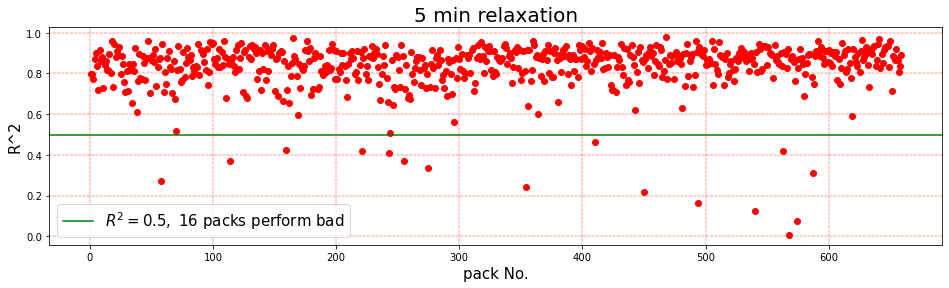

不好的packs(R^2<0.5):	 [ 57 113 158 220 242 254 274 353 409 449 493 539 562 567 573 586]


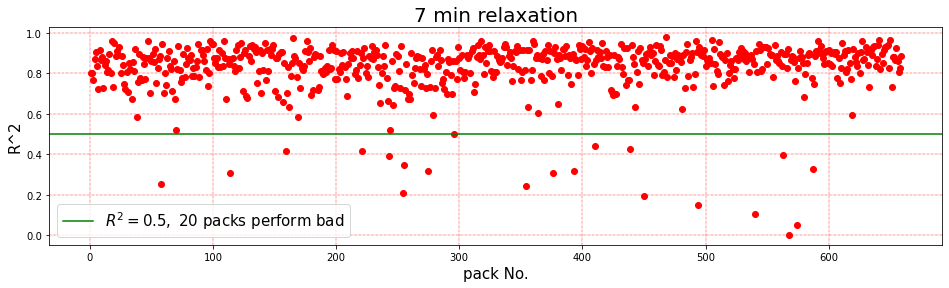

不好的packs(R^2<0.5):	 [ 57 113 158 220 242 253 254 274 353 375 392 409 438 449 493 539 562 567
 573 586]


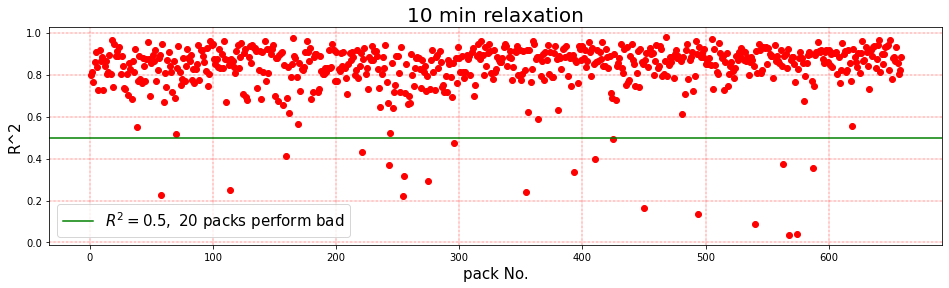

不好的packs(R^2<0.5):	 [ 57 113 158 220 242 253 254 274 295 353 392 409 424 449 493 539 562 567
 573 586]

不好的modules個數:	 108


In [210]:
'''畫圖+限制j(theta)去偏誤'''
import os
import numpy as np
import matplotlib.pyplot as plt

Rpack = np.empty((659,9), dtype = object)

txt = r"C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\Q+T弛豫0_10min.csv"
data = np.genfromtxt(txt, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, usecols=np.arange(0,18), invalid_raise = False, encoding = 'latin-1')
for i in range(8):
    rex = data[:,i+10]
    SOH = data[:,9]
    Rrx = np.corrcoef(rex, SOH)[0,1]; Rrex = np.round(Rrx*Rrx,3)
    print("弛豫: (>0.5:good)\n",[Rrex,len(SOH)])
    '''每一組的相關性'''
    for j in range(659):
        if i==7:
            rex_j = rex[j*34:(j+1)*34-1]; zer_rex_j = [uu for uu,vv in enumerate(rex_j) if vv>-0.02 or vv<-0.74]
        else:
            rex_j = rex[j*34:(j+1)*34-1]; zer_rex_j = [uu for uu,vv in enumerate(rex_j) if vv>-0.02 or vv<i*(-0.1)-0.14]
        SOH_j = SOH[j*34:(j+1)*34-1]; zer_SOH_j = [ww for ww,zz in enumerate(SOH_j) if zz<0.2]     # 去掉200秒以下的
        zero_j = zer_rex_j+zer_SOH_j
        rex_j_Adj = np.delete(rex_j[:], zero_j);
        SOH_j_Adj = np.delete(SOH_j[:], zero_j); wrong = len(zero_j)
        Rp = np.corrcoef(rex_j_Adj, SOH_j_Adj)[0,1]; Rpak = np.round(Rp*Rp,3)
        Rpack[j,0] = wrong
        Rpack[j,i+1] = Rpak
    '''去除BIAS'''     
    m1, b1 = np.polyfit(rex.T.astype(np.float64),SOH.T, 1);
    h = (m1*rex+b1-SOH)**2;
    bias = np.argsort(h)[-110:];
    if i==0:
        zer_rex = [u for u,v in enumerate(rex) if v>-0.02 or v<-0.12]
    else:
        zer_rex = [u for u,v in enumerate(rex) if v>-0.02]
    zer_soh = [w for w,z in enumerate(SOH) if z<0.2]
    error = sorted(set(zer_rex+zer_soh+bias.tolist()))
    rex_Adj = np.delete(rex[:], error);
    SOH_Adj = np.delete(SOH[:], error);
    '''量有效相關性'''
    Rrx_adj = np.corrcoef(rex_Adj, SOH_Adj)[0,1]; Rrex_adj = np.round(Rrx_adj*Rrx_adj,3)
    print("弛豫_adj: (>0.5:good)\n",[Rrex_adj,len(SOH_Adj)])
    '''畫圖'''
    plt.figure(figsize=(5,5))
    plt.plot(rex_Adj,SOH_Adj,'ro')
    m2, b2 = np.polyfit(rex_Adj.T.astype(np.float64),SOH_Adj.T, 1);
    plt.axline(xy1=(0, b2), slope=m2, color='g', label=f'$y = {m2:.2f}x {b2:+.2f}$\n R^2 = {Rrex_adj}')
    plt.xlabel("Voltage variation (V)", fontsize=15)
    plt.ylabel("discharge capacity (Ah)", fontsize=15)
    Title = ["01 sec relaxation","10 sec relaxation","30 sec relaxation","60 sec relaxation","3 min relaxation","5 min relaxation","7 min relaxation","10 min relaxation"]
    plt.title(Title[i], fontsize=20);
    plt.grid(color='r', linestyle='-.', linewidth=0.2)
    plt.legend(fontsize=15); plt.show()

np.savetxt(r"C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\每一組的相關性.csv",Rpack,delimiter=',')
for n in range(1,9):
    plt.figure(figsize=(16,4))
    plt.plot(range(1,660),Rpack[:,n],'ro')
    low = sum(ii < 0.5 for ii in Rpack[:,n])
    bad = np.where(Rpack[:,n]<0.5)[0];
    plt.axline(xy1=(0, 0.5), slope=0, color='g', label=f'$R^2 = 0.5,$ {low} packs perform bad')
    plt.xlabel("pack No.", fontsize=15)
    plt.ylabel("R^2", fontsize=15)
    plt.title(Title[n-1], fontsize=20);
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    plt.legend(fontsize=15); plt.show()
    print("不好的packs(R^2<0.5):\t",bad)

print("\n不好的modules個數:\t",sum(Rpack[:,0]))


In [143]:
import os
import numpy as np
import matplotlib.pyplot as plt

arr = [0.301, 0.802, 0.462, 0.154, 0.435, 0.878, 0.239, 0.294, 0.771, 0.682]
# 第2大数值
max2 = np.sort(arr)[-3:]
# 第2大索引
index2 = np.argsort(arr)[-3:]

print("arr\n",arr)
print(max2)
print(max_index2)


arr
 [0.301, 0.802, 0.462, 0.154, 0.435, 0.878, 0.239, 0.294, 0.771, 0.682]
[8 1 5]


弛豫_: (>0.5:good)
 [0.049, 22406]
zero
 [666, 1091, 1108, 1272, 2277, 2461, 2858, 2952, 2953, 2955, 3705, 3862, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 7674, 8191, 8289, 8624, 8649, 8659, 8666, 8899, 8996, 9195, 9396, 9463, 9564, 9744, 9960, 11412, 12031, 12032, 12034, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14429, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16164, 16301, 16507, 16956, 17061, 17146, 17305, 18248, 18346, 18517, 18592, 18690, 18959, 19290, 19494, 19572, 19739, 19752, 21323, 21343, 21928, 22328]
弛豫_adj: (>0.5:good)
 [0.303, 22319]


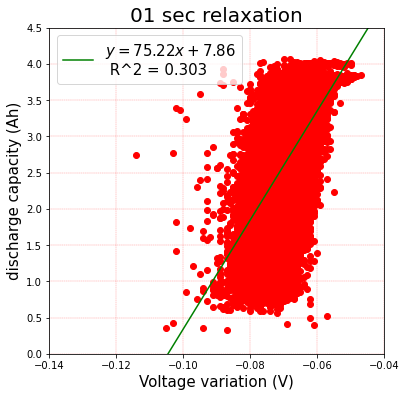

弛豫_: (>0.5:good)
 [0.345, 22406]
zero
 [666, 1091, 1108, 1272, 2277, 2461, 2858, 2952, 2953, 2955, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8289, 8624, 8649, 8659, 8666, 8899, 8996, 9195, 9396, 9463, 9564, 9744, 9960, 11412, 12031, 12032, 12034, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16164, 16956, 17061, 17146, 17305, 18248, 18346, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343, 21928, 22328]
弛豫_adj: (>0.5:good)
 [0.741, 22325]


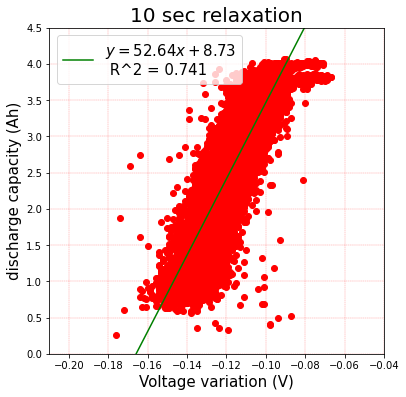

弛豫_: (>0.5:good)
 [0.51, 22406]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 2955, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8289, 8624, 8649, 8659, 8666, 8899, 8996, 9195, 9396, 9463, 9564, 9744, 9960, 11412, 12031, 12032, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.776, 22332]


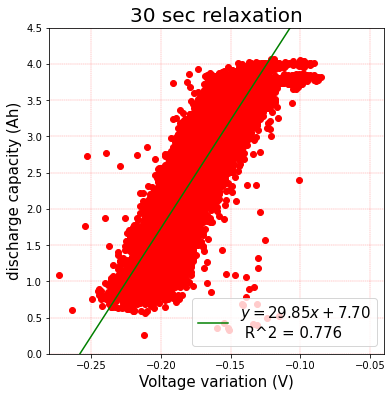

弛豫_: (>0.5:good)
 [0.555, 22406]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 8996, 9195, 9396, 9463, 9564, 9960, 11412, 12031, 12032, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.771, 22336]


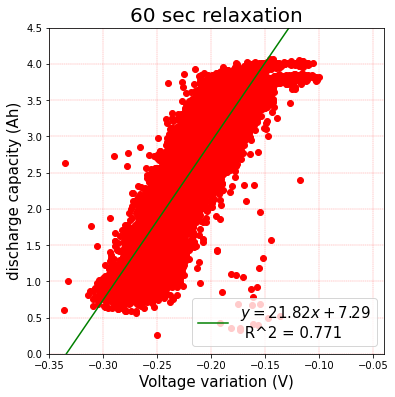

弛豫_: (>0.5:good)
 [0.584, 22406]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 8996, 9195, 9396, 9463, 9564, 9960, 11412, 12031, 12032, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.767, 22336]


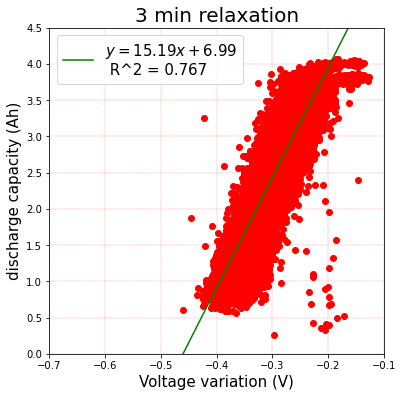

弛豫_: (>0.5:good)
 [0.588, 22406]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 8996, 9195, 9396, 9463, 9564, 9960, 11412, 12031, 12032, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.768, 22336]


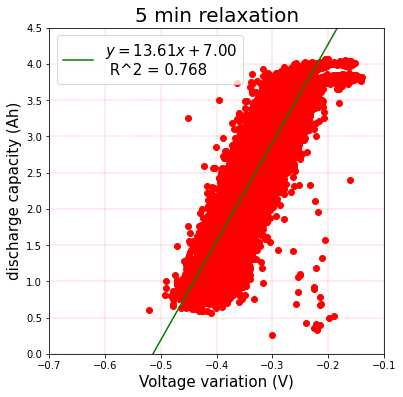

弛豫_: (>0.5:good)
 [0.588, 22406]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 12032, 12421, 12772, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.766, 22340]


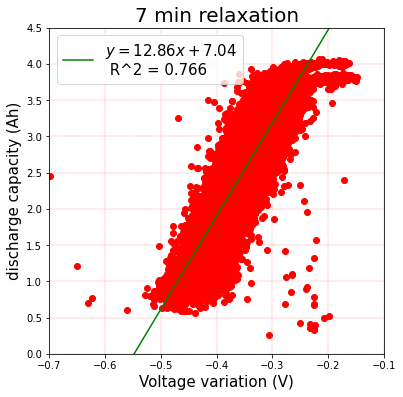

弛豫_: (>0.5:good)
 [0.585, 22406]
zero
 [666, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.756, 22346]


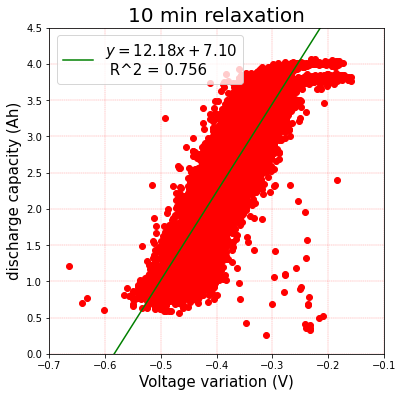

In [114]:
'''畫圖+限制x軸的值去偏誤'''
import os
import numpy as np
import matplotlib.pyplot as plt

txt = r"C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\Q+T弛豫0_10min.csv"
data = np.genfromtxt(txt, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, usecols=np.arange(0,18), invalid_raise = False, encoding = 'latin-1')
for i in range(8):
    rex = data[:,i+10]
    SOH = data[:,9]
    Rrx = np.corrcoef(rex, SOH)[0,1]; Rrex = np.round(Rrx*Rrx,3)
    print("弛豫_: (>0.5:good)\n",[Rrex,len(SOH)])
    # 去除BIAS
    if i<2:
        zer_rex = [u for u,v in enumerate(rex) if v>-0.01 or v<(i+2)*(-0.06)]     ## 特別調整
    else:
        zer_rex = [u for u,v in enumerate(rex) if v>-0.01 or v<(i+1)*(-0.1)]     ## 特別調整    
    zer_soh = [w for w,z in enumerate(SOH) if z<0.2]     ## 萬用
    zero = sorted(set(zer_rex+zer_soh))    
    rex_Adj = np.delete(rex[:], zero);
    SOH_Adj = np.delete(SOH[:], zero);
    # 求正確關係
    Rrx_adj = np.corrcoef(rex_Adj, SOH_Adj)[0,1]; Rrex_adj = np.round(Rrx_adj*Rrx_adj,3)
    print("zero\n",zero)
    print("弛豫_adj: (>0.5:good)\n",[Rrex_adj,len(SOH_Adj)])
    # 畫圖
    plt.figure(figsize=(6,6))
    plt.plot(rex_Adj,SOH_Adj,'ro')
    m1, b1 = np.polyfit(rex_Adj.T.astype(np.float64),SOH_Adj.T, 1);
    plt.axline(xy1=(0, b1), slope=m1, color='g', label=f'$y = {m1:.2f}x {b1:+.2f}$\n R^2 = {Rrex_adj}')
    plt.xlabel("Voltage variation (V)", fontsize=15)
    plt.ylabel("discharge capacity (Ah)", fontsize=15)
    Title = ["01 sec relaxation","10 sec relaxation","30 sec relaxation","60 sec relaxation","3 min relaxation","5 min relaxation","7 min relaxation","10 min relaxation"]
    plt.title(Title[i], fontsize=20);
    if i<4:
        plt.xlim((i+2)*(-0.07),-0.04); plt.ylim(0,4.5)
    else:
        plt.xlim(-0.7,-0.1); plt.ylim(0,4.5)
    plt.grid(color='r', linestyle='-.', linewidth=0.2)
    plt.legend(fontsize=15); plt.show()


C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_10000KM\T20715002_B&A\J21T04822\M21.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20108005_B&A\J21T03707\M21.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20806002_B&A\J21T03715\M34.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20A15005_B&A\J22T00227\M14.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_30000KM\T20214003_B&A\J21T03634\M29.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_30000KM\T20214003_B&A\J21T03634\M30.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_30000KM\T20A13001_B&A\J21T03007\M34.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_40000KM\T20617004_B&A\J21T03165\M14.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_40000KM\T20926001_B&A\J21T04490\M09.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_H_10000KM\T20318006_B&A\J21T03414\M30.csv
C:\Users\C

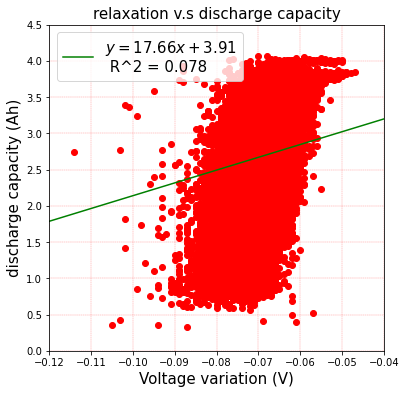


弛豫: (>0.5:good)
 [0.345, 22406]
zer_rex
 [666, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6869, 7510, 8191, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zero
 [666, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6869, 7510, 8191, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 15005, 15

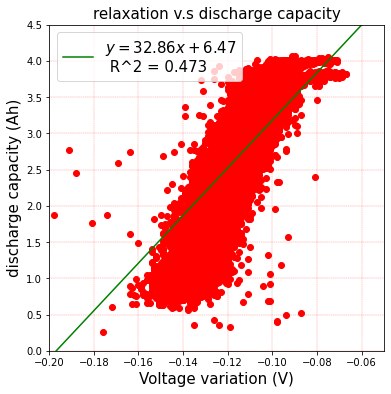


弛豫: (>0.5:good)
 [0.51, 22406]
zer_rex
 [666, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6869, 7510, 8191, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zero
 [666, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6869, 7510, 8191, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 15005, 150

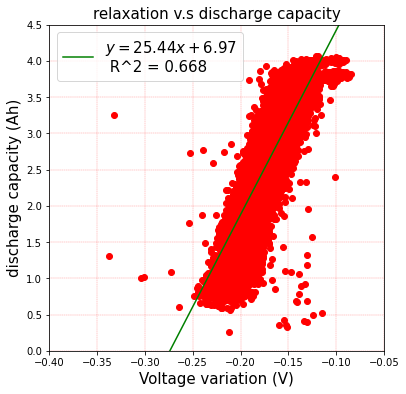


弛豫: (>0.5:good)
 [0.555, 22406]
zer_rex
 [666, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zero
 [666, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 1444

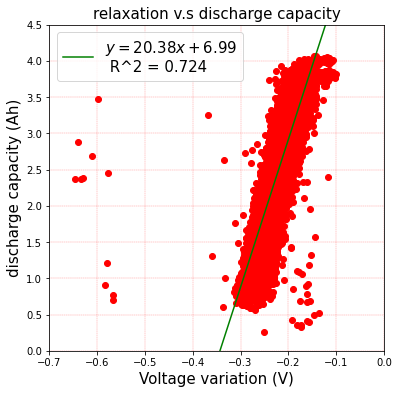


弛豫: (>0.5:good)
 [0.584, 22406]
zer_rex
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 12032, 12421, 12772, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 12032, 1

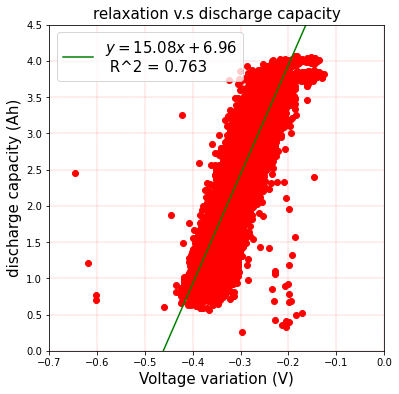


弛豫: (>0.5:good)
 [0.588, 22406]
zer_rex
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 12032, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 1

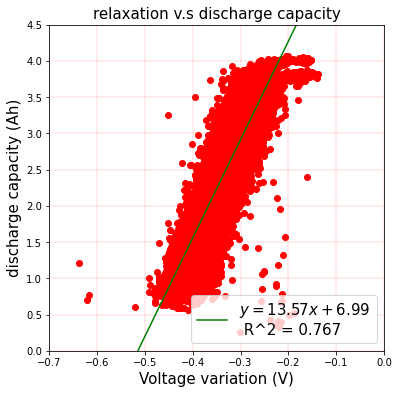


弛豫: (>0.5:good)
 [0.588, 22406]
zer_rex
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 12032, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 1

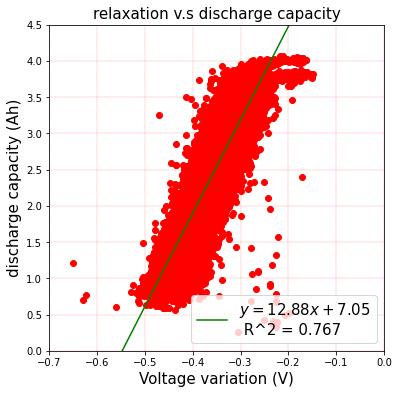


弛豫: (>0.5:good)
 [0.585, 22406]
zer_rex
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 11412, 12031, 12032, 12421, 12772, 13339, 13447, 13535, 13792, 13926, 13968, 14156, 14159, 14380, 14449, 14629, 14869, 14909, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 17305, 18248, 18517, 18592, 18690, 19290, 19494, 19572, 19739, 19752, 21323, 21343]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
zero
 [666, 1091, 1108, 2277, 2461, 2952, 2953, 3705, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6162, 6822, 6869, 7510, 8191, 8624, 8649, 8659, 8899, 9195, 9463, 9564, 9960, 1

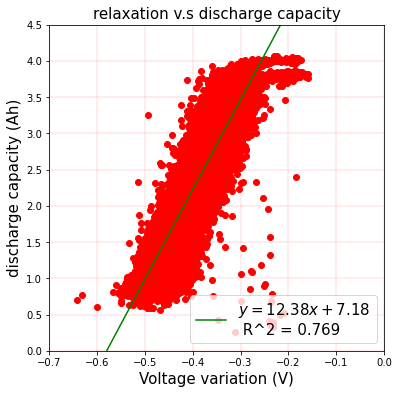

In [105]:
'''弛豫_10sec-10min(0726)'''
'''改了10min的終點和起點,相關係數上升...'''
import os
import numpy as np
import matplotlib.pyplot as plt

rx03 = []; rx05 = []; rx07 = []; rx75 = []; rx08 = []; rx85 = []; rx09 = [];  rx10 = []; SOH = []
rx03T = []; rx05T = []; rx07T = []; rx75T = []; rx08T = []; rx85T = []; rx09T = []; rx10T = [];

for dirpath, dirnames, filenames in os.walk(r"C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU"):     #\RMA_E_10000KM\T19C30004_B&A;
    for f in filenames:
        a = os.path.join(dirpath,f)
        if os.path.isfile(a):     #判斷是否是檔案,是檔案才打開
            if 'csv' in a:
                try:
                    data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, usecols=np.arange(0,3), invalid_raise = False, encoding = 'latin-1')
                    [Row,Column] = data.shape
                    dat_r = np.round(data[4:,2].astype(np.float64),1)     # 把'安培'四捨五入
                # Relaxation analysis                  
                    rx = np.where(abs(dat_r)<6);
                    rxp1 = np.where(rx[0][1:]-rx[0][0:-1]>100)[0];     # [rxp1[0]+1,rxp1[0]+181,rxp1[0]+301,rxp1[0]+421]
                    rxp2 = np.hstack([rxp1[0]+1,rxp1[0]+1,rxp1[0]+10,rxp1[0]+30,rxp1[0]+60,rxp1[0]+180,rxp1[0]+300,rxp1[0]+420,rxp1[1]-1,-1]);     # [0,rxp1[0],rxp1[0]+1,rxp1[1],-1]
                    rxp3 = rx[0][rxp2];          # 挑rest period的起始時間(連續的)
                    rxp4 = [rxp3[0]-1,rxp3[1],rxp3[2],rxp3[3],rxp3[4],rxp3[5],rxp3[6],rxp3[7],rxp3[8]]
                    rxv = data[4:,1][rxp4].astype(np.float64);                    # Relaxation voltage
                    rx03min = np.round(rxv[1]-rxv[0],3)     # 看歐姆極化
                    rx05min = np.round(rxv[2]-rxv[0],3)     # 極化10s
                    rx07min = np.round(rxv[3]-rxv[0],3)     # 極化30s
                    rx75min = np.round(rxv[4]-rxv[0],3)     # 看01極化
                    rx08min = np.round(rxv[5]-rxv[0],3)     # 看03極化
                    rx85min = np.round(rxv[6]-rxv[0],3)     # 看05極化
                    rx09min = np.round(rxv[7]-rxv[0],3)     # 看07極化
                    rx10min = np.round(rxv[8]-rxv[0],3)     # 看10極化
                    soh = rxp3[9]-rxp3[8]
                except:
                    print(a)
                    rx03min = 0; rx75min = 0;
                    rx05min = 0; rx08min = 0;
                    rx07min = 0; rx85min = 0;
                    rx10min = 0; rx09min = 0;
                    soh = data[-1][0].astype(np.int64)
                if 'Q' in a:
                    rx03.append(rx03min); rx75.append(rx75min);
                    rx05.append(rx05min); rx08.append(rx08min);
                    rx07.append(rx07min); rx85.append(rx85min);
                    rx10.append(rx10min); rx09.append(rx09min);
                elif 'Q' not in a:
                    rx03T.append(rx03min); rx75T.append(rx75min);
                    rx05T.append(rx05min); rx08T.append(rx08min);
                    rx07T.append(rx07min); rx85T.append(rx85min);
                    rx10T.append(rx10min); rx09T.append(rx09min);
                    SOH.append(soh*6.5/3600)

'''需要時把rx10,rx10T補上'''
file = np.asarray([rx03,rx05,rx07,rx75,rx08,rx85,rx09,rx10,np.zeros((1,len(rx07)))[0],SOH,rx03T,rx05T,rx07T,rx75T,rx08T,rx85T,rx09T,rx10T]).T
#fff = np.array([ff]).T
#np.savetxt(r"C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\資料編號.csv",fff, fmt='%s')     # 把字串載入excel:fmt='%s'
np.savetxt(r"C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\Q+T弛豫0_10min.csv",file,delimiter=',')

'''以下畫圖跟算"有效相關係數"區域  以下畫圖跟算"有效相關係數"區域'''
def plotresult(result):
    Rrx = np.corrcoef(result, SOH)[0,1]; Rrex = np.round(Rrx*Rrx,3)
    print("\n弛豫: (>0.5:good)\n",[Rrex,len(result)])
    # 去除0
    zer_rex = [u for u,v in enumerate(result) if v>-0.01 or v<-0.65]     ## 特別調整
    zer_soh = [w for w,z in enumerate(SOH) if z<0.2]     ## 萬用
    zero = sorted(set(zer_rex+zer_soh))    
    rx_Adj = np.delete(result[:], zero);
    SOH_Adj = np.delete(SOH[:], zero);
    # 求正確關係
    Rrx_adj = np.corrcoef(rx_Adj, SOH_Adj)[0,1]; Rrex_adj = np.round(Rrx_adj*Rrx_adj,3)
    print("zer_rex\n",zer_rex); print("zer_soh\n",zer_soh); print("zero\n",zero)
    print("弛豫_adj: (>0.5:good)\n",[Rrex_adj,len(rx_Adj)])
    # 畫圖
    plt.figure(figsize=(6,6))
    plt.plot(rx_Adj,SOH_Adj,'ro')
    m1, b1 = np.polyfit(rx_Adj.T.astype(np.float64),SOH_Adj.T, 1);
    plt.axline(xy1=(0, b1), slope=m1, color='g', label=f'$y = {m1:.2f}x {b1:+.2f}$\n R^2 = {Rrex_adj}')
    plt.xlabel("Voltage variation (V)", fontsize=15)
    plt.ylabel("discharge capacity (Ah)", fontsize=15)
    plt.title("relaxation v.s discharge capacity", fontsize=15);
    if result==rx03T:
        plt.xlim(-0.12,-0.04); plt.ylim(0,4.5)
    elif result==rx05T:
        plt.xlim(-0.2,-0.05); plt.ylim(0,4.5)
    elif result==rx07T:
        plt.xlim(-0.4,-0.05); plt.ylim(0,4.5)
    else:
        plt.xlim(-0.7,0); plt.ylim(0,4.5)
    plt.grid(color='r', linestyle='-.', linewidth=0.2)
    plt.legend(fontsize=15); plt.show()

plotresult(rx03T)
plotresult(rx05T)
plotresult(rx07T)
plotresult(rx75T)
plotresult(rx08T)
plotresult(rx85T)
plotresult(rx09T)
plotresult(rx10T)


In [82]:
print(dirname)

NameError: name 'dirname' is not defined

In [55]:
import numpy as np

a = [1,2,3,4,5,6,7,6,5,11,13,14,16]
c = [2,3,2,3]
d = ['wer','rew']
e = a+c+d
print(e)
#print(type(np.asarray([e]))
#b = sorted(set(a+c+d))
#print(b)

[1, 2, 3, 4, 5, 6, 7, 6, 5, 11, 13, 14, 16, 2, 3, 2, 3, 'wer', 'rew']


C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_10000KM\T20422001_B&A\J20T03794\M13.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_10000KM\T20715002_B&A\J21T04822\M21.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20108005_B&A\J21T03707\M21.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20319005_B&A\J20Q00300\M23.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20622003_B&A\J21T00081\M26.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20622003_B&A\J21T00081\M33.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20806002_B&A\J21T03715\M34.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T20A15005_B&A\J22T00227\M14.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_20000KM\T21330004_B&A\J22T01858\M11.csv
C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU\RMA_E_30000KM\T20214003_B&A\J21T03634\M29.csv
C:\Users\C

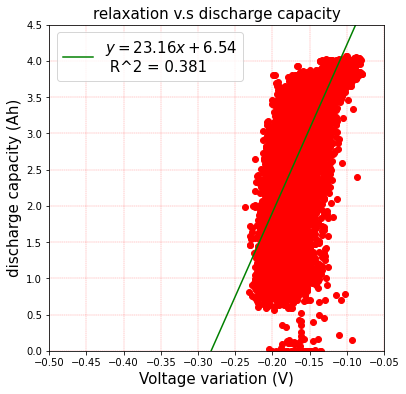


弛豫: (>0.5:good)
 [0.188, 22406]
zer_rex
 [682, 1416, 5245, 5905, 6904, 12883, 17050, 17679, 17736, 19383, 19384, 19408]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.396, 22345]


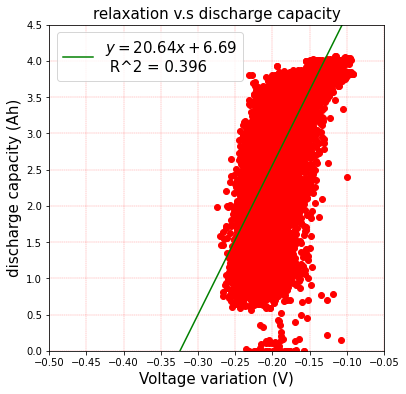


弛豫: (>0.5:good)
 [0.211, 22406]
zer_rex
 [682, 1416, 5245, 5905, 6904, 12883, 17050, 17679, 17736, 19383, 19384, 19408]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.407, 22345]


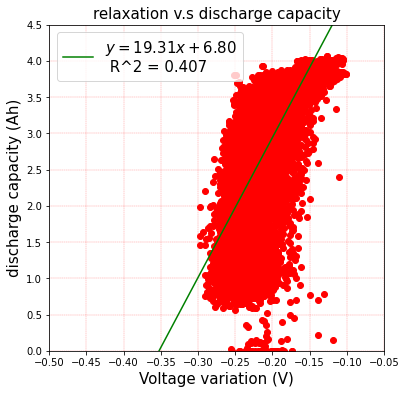


弛豫: (>0.5:good)
 [0.215, 22406]
zer_rex
 [682, 1416, 5245, 5905, 6904, 12883, 17050, 17679, 17736, 19383, 19384, 19408]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.409, 22345]


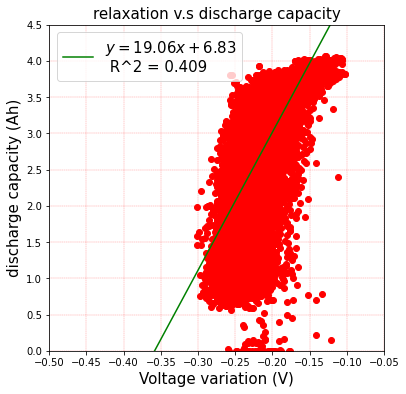


弛豫: (>0.5:good)
 [0.22, 22406]
zer_rex
 [682, 1416, 5245, 5905, 6904, 12883, 17050, 17679, 17736, 19383, 19384, 19408]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.411, 22345]


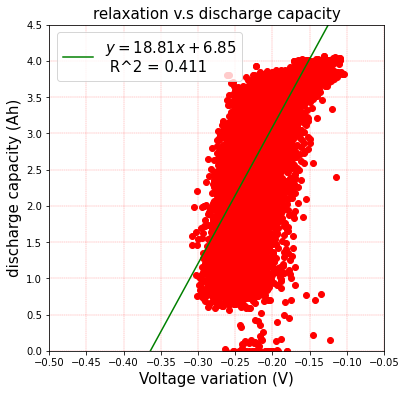


弛豫: (>0.5:good)
 [0.224, 22406]
zer_rex
 [682, 1416, 5245, 5905, 6904, 12883, 17050, 17679, 17736, 19383, 19384, 19408]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.413, 22345]


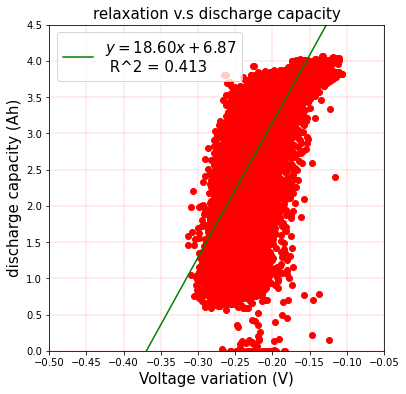


弛豫: (>0.5:good)
 [0.193, 22406]
zer_rex
 [682, 1416, 1433, 5245, 5905, 6904, 12883, 17050, 17679, 17736, 19383, 19384, 19408]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.414, 22344]


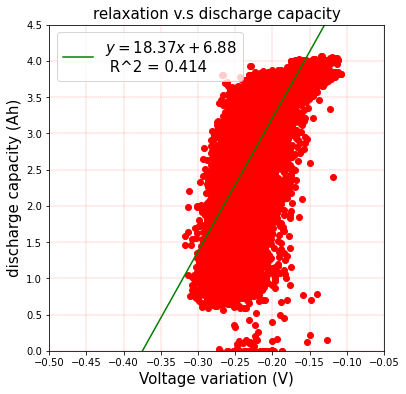


弛豫: (>0.5:good)
 [0.378, 22406]
zer_rex
 [682, 1416, 5245, 5905, 6904, 12883, 17050, 17679, 17736, 19383, 19384, 19408]
zer_soh
 [666, 1108, 2277, 2461, 2952, 2953, 4297, 4462, 4857, 5425, 5519, 5533, 5684, 5732, 6869, 7510, 8191, 8659, 9195, 9463, 9564, 9960, 12032, 12421, 13447, 13535, 13926, 13968, 14156, 14449, 14629, 14869, 15005, 15011, 15040, 15048, 15596, 16084, 16956, 17061, 17146, 18517, 18690, 19290, 19494, 19739, 19752, 21323, 21343]
弛豫_adj: (>0.5:good)
 [0.418, 22345]


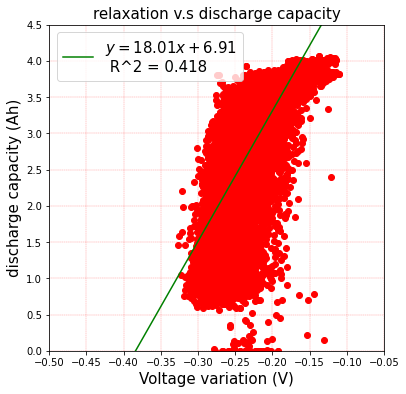

In [9]:
'''弛豫_3-10 min(0725)'''
'''改了10min的終點,多減一秒相關係數暴衝...'''
import os
import numpy as np
import matplotlib.pyplot as plt

rx03 = []; rx05 = []; rx07 = []; rx75 = []; rx08 = []; rx85 = []; rx09 = [];  rx10 = []; SOH = []
rx03T = []; rx05T = []; rx07T = []; rx75T = []; rx08T = []; rx85T = []; rx09T = []; rx10T = []

for dirpath, dirnames, filenames in os.walk(r"C:\Users\Chun-Po\Documents\Python Scripts\B&A to NTU"):     #\RMA_E_10000KM\T19C30004_B&A;
    for f in filenames:
        a = os.path.join(dirpath,f)
        if os.path.isfile(a):     #判斷是否是檔案,是檔案才打開
            if 'csv' in a:
                try:
                    data = np.genfromtxt(a, dtype = None, delimiter = ',', skip_header = 0, filling_values = 0, usecols=np.arange(0,3), invalid_raise = False, encoding = 'latin-1')
                    [Row,Column] = data.shape
                    dat_r = np.round(data[4:,2].astype(np.float64),1)     # 把'安培'四捨五入                  
                # Relaxation analysis                  
                    rx = np.where(abs(dat_r)<6);
                    rxp1 = np.where(rx[0][1:]-rx[0][0:-1]>100)[0];     # [rxp1[0]+1,rxp1[0]+181,rxp1[0]+301,rxp1[0]+421]
                    rxp2 = np.hstack([rxp1[0]+1,rxp1[0]+181,rxp1[0]+301,rxp1[0]+421,rxp1[0]+451,rxp1[0]+481,rxp1[0]+511,rxp1[0]+541,rxp1[1]-1,-1]);     # [0,rxp1[0],rxp1[0]+1,rxp1[1],-1]
                    rxp3 = rx[0][rxp2];          # 挑rest period的起始時間(連續的)
                    rxp4 = [rxp3[0],rxp3[1],rxp3[2],rxp3[3],rxp3[4],rxp3[5],rxp3[6],rxp3[7],rxp3[8]]
                    rxv = data[4:,1][rxp4].astype(np.float64);                    # Relaxation voltage
                    rx03min = np.round(rxv[1]-rxv[0],3)
                    rx05min = np.round(rxv[2]-rxv[0],3)
                    rx07min = np.round(rxv[3]-rxv[0],3)
                    rx75min = np.round(rxv[4]-rxv[0],3)
                    rx08min = np.round(rxv[5]-rxv[0],3)
                    rx85min = np.round(rxv[6]-rxv[0],3)
                    rx09min = np.round(rxv[7]-rxv[0],3)
                    rx10min = np.round(rxv[8]-rxv[0],3)
                    soh = rxp3[9]-rxp3[8]
                except:
                    print(a)
                    rx03min = 0; rx75min = 0;
                    rx05min = 0; rx08min = 0;
                    rx07min = 0; rx85min = 0;
                    rx09min = 0; rx10min = 0;
                    soh = data[-1][0].astype(np.int64)
                if 'Q' in a:
                    rx03.append(rx03min); rx75.append(rx75min);
                    rx05.append(rx05min); rx08.append(rx08min);
                    rx07.append(rx07min); rx85.append(rx85min);
                    rx09.append(rx09min); rx10.append(rx10min);
                elif 'Q' not in a:
                    rx03T.append(rx03min); rx75T.append(rx75min);
                    rx05T.append(rx05min); rx08T.append(rx08min);
                    rx07T.append(rx07min); rx85T.append(rx85min);
                    rx09T.append(rx09min); rx10T.append(rx10min);
                    SOH.append(soh*6.5/3600)

file = np.asarray([rx03,rx05,rx07,rx75,rx08,rx85,rx09,rx10,np.zeros((1,len(rx07)))[0],SOH,rx03T,rx05T,rx07T,rx75T,rx08T,rx85T,rx09T,rx10T]).T
np.savetxt(r'C:\Users\Chun-Po\Documents\Python Scripts\儲存分析結果(數據)\Q+T弛豫3_10min.csv',file,delimiter=',')

'''以下畫圖跟算"有效相關係數"區域  以下畫圖跟算"有效相關係數"區域'''
def plotresult(result):
    Rrx = np.corrcoef(result, SOH)[0,1]; Rrex = np.round(Rrx*Rrx,3)
    print("\n弛豫: (>0.5:good)\n",[Rrex,len(result)])
    # 去除0
    zer_rex = [u for u,v in enumerate(result) if v>-0.05 or v<-0.5]     ## 特別調整
    zer_soh = [w for w,z in enumerate(SOH) if z<0.2]     ## 萬用
    rx_adj = np.delete(result[:], zer_rex); rx_Adj = np.delete(rx_adj[:], zer_soh);
    SOH_adj = np.delete(SOH[:], zer_rex); SOH_Adj = np.delete(SOH_adj[:], zer_soh)
    # 求正確關係
    Rrx_adj = np.corrcoef(rx_Adj, SOH_Adj)[0,1]; Rrex_adj = np.round(Rrx_adj*Rrx_adj,3)
    print("zer_rex\n",zer_rex); print("zer_soh\n",zer_soh)
    print("弛豫_adj: (>0.5:good)\n",[Rrex_adj,len(rx_Adj)])
    # 畫圖
    plt.figure(figsize=(6,6))
    plt.plot(rx_Adj,SOH_Adj,'ro')
    m1, b1 = np.polyfit(rx_Adj.T.astype(np.float64),SOH_Adj.T, 1);
    plt.axline(xy1=(0, b1), slope=m1, color='g', label=f'$y = {m1:.2f}x {b1:+.2f}$\n R^2 = {Rrex_adj}')
    plt.xlabel("Voltage variation (V)", fontsize=15)
    plt.ylabel("discharge capacity (Ah)", fontsize=15)
    plt.title("relaxation v.s discharge capacity", fontsize=15);
    plt.xlim(-0.5,-0.05); plt.ylim(0,4.5)
    plt.grid(color='r', linestyle='-.', linewidth=0.2)
    plt.legend(fontsize=15); plt.show()

plotresult(rx03)
plotresult(rx05)
plotresult(rx07)
plotresult(rx75)
plotresult(rx08)
plotresult(rx85)
plotresult(rx09)
plotresult(rx10)
